<a href="https://colab.research.google.com/github/DinaTTomoum/Thesis2021/blob/main/ngrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Import the libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
# Import re is regular expressions
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import nltk
from nltk.corpus import stopwords
import spacy
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# load in all the modules for ngram
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams
from nltk import FreqDist


In [ ]:
from google.colab import files
uploaded = files.upload()  


Saving US Elections All Tweets.csv to US Elections All Tweets.csv


FileNotFoundError: ignored

In [ ]:
import pandas as pd
data = pd.read_csv('US Elections All Tweets.csv', encoding= 'unicode_escape')

In [ ]:
data.head()

,handle,Election,text,is_retweet,original_author,date,time,in_reply_to_screen_name,is_quote_status,lang,retweet_count,favorite_count,place_full_name,place_name,place_country,source_url
0,HillaryClinton,2016,The question in this election: Who can put the...,False,NaN,9/28/2016,0:22:34,NaN,False,en,218,651,NaN,NaN,NaN,https://studio.twitter.com
1,HillaryClinton,2016,"Last night, Donald Trump said not paying taxes...",True,timkaine,9/27/2016,23:45:00,NaN,False,en,2445,5308,NaN,NaN,NaN,http://twitter.com
2,HillaryClinton,2016,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,9/27/2016,23:26:40,NaN,False,en,7834,27234,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck
3,HillaryClinton,2016,"If we stand together, there's nothing we can't...",False,NaN,9/27/2016,23:08:41,NaN,False,en,916,2542,NaN,NaN,NaN,https://studio.twitter.com
4,HillaryClinton,2016,Both candidates were asked about how they'd co...,False,NaN,9/27/2016,22:30:27,NaN,False,en,859,2882,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck


In [ ]:

# or punctuation marks other than periods. (We'll consider the end of the sentence
# a "word") We also don't want to consider capitalization. 
import re

df_new = df.text.astype(str)
df_new.head()

0    Join me for a 3pm rally - tomorrow at the Mid-...
1    Once again, we will have a government of, by a...
2    On National #VoterRegistrationDay, make sure y...
3    Hillary Clinton's Campaign Continues To Make F...
4    'CNBC, Time magazine online polls say Donald T...
Name: text, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'


def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet


# # cleaning master function
# def clean_tweet(tweet, bigrams=False):
#     tweet = remove_users(tweet)
#     tweet = remove_links(tweet)
#     tweet = tweet.lower() # lower case
#     tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
#     tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
#     tweet = re.sub(r'[^\x00-\x7F]+','', tweet)
#     tweet_token_list = [word for word in tweet.split(' ')
#                             if word not in my_stopwords] # remove stopwords

#     if bigrams:
#         tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
#                                             for i in range(len(tweet_token_list)-1)]
#     tweet = ' '.join(tweet_token_list)
#     return tweet


#create a function to clean the tweets
def cleanTxt(text) :
  text = remove_users(text)
  text = remove_links(text)
  text = text.lower() # lower case
  text = re.sub('['+my_punctuation + ']+', ' ', text) # strip punctuation
  text = re.sub('([0-9]+)', '', text) # remove numbers
  text = re.sub(r'[^\x00-\x7F]+','', text)

  text = re.sub('@[^A-Za-z0-9^,!.\/+-=]', '', text) #remove mentions
  text = re.sub(r'#', '', text) #remove the hashtag symbol
  text= re.sub(r'RT[\s]+', '', text) #removing RT (retweets) text 
  text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
  text = re.sub('ENDOFARTICLE.','', text) # get rid of the "ENDOFARTICLE." text
  tweet_token_list = [word for word in text.split(' ')
                            if word not in my_stopwords] # remove stopwords
  text = ' '.join(tweet_token_list)

  return text
df_cln= data.text.apply(cleanTxt)
cln = [' '.join(df_cln)]
listToStr = ' '.join(map(str, cln))   
#print(listToStr) # unhyphenate in case you want to see it



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_cln

0        question election  put plans action make life ...
1        last night  donald trump said paying taxes  sm...
2        proud   vision command last night debate showe...
3        stand together  nothing  \n\nmake sure ready v...
4        candidates asked confront racial injustice  on...
                               ...                        
22229      dont know  thinks continue lie  \n\nhe wants...
22230      president  excels communicating directly ame...
22231      live  presidential debate debates\n\ntext vo...
22232    signed order support workers delphi corporatio...
22233    suburban women want safety  amp  security  joe...
Name: text, Length: 22234, dtype: object

In [ ]:

#Same as below text
# first get individual words
# tokenized = listToStr.split()
# # and get a list of all the bi-grams
# esBigrams = ngrams(tokenized, 4)

# # If you like, you can uncomment the next like to take a look at 
# # the first ten to make sure they look ok. Please note that doing so 
# # will consume the generator & will break the next block of code, so you'll
# # need to re-comment it and run this block again to get it to work.
# list(esBigrams)[:10]
# #list(tokenized)[:10]

In [ ]:

import nltk
from nltk.util import ngrams
nltk.download('punkt')

# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
onegram = ("1-gram: ", extract_ngrams(listToStr, 1))
twogram = ("2-gram: ", extract_ngrams(listToStr, 2))
threegram = ("3-gram: ", extract_ngrams(listToStr, 3))
fourgram = ("4-gram: ", extract_ngrams(listToStr, 4))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
fourgram[1][1:4]

['election put plans action',
 'put plans action make',
 'plans action make life']

In [ ]:
esBigramFreq = collections.Counter(list(threegram[1]))
esBigramFreq.most_common(40)

[('complete total endorsement', 184),
 ('make america great', 182),
 ('crooked hillary clinton', 76),
 ('sleepy joe biden', 69),
 ('fake news media', 66),
 ('president united states', 64),
 ('law amp order', 64),
 ('beat donald trump', 55),
 ('battle soul nation', 44),
 ('approval rating republican', 42),
 ('rating republican party', 42),
 ('coronavirus task force', 40),
 ('united states america', 38),
 ('donald j trump', 36),
 ('build back better', 34),
 ('make voice heard', 33),
 ('live president holds', 33),
 ('amy coney barrett', 32),
 ('radical left democrats', 32),
 ('president donald trump', 29),
 ('today last day', 29),
 ('live press briefing', 29),
 ('press briefing coronavirus', 29),
 ('briefing coronavirus task', 29),
 ('every single day', 28),
 ('president holds news', 28),
 ('holds news conference', 28),
 ('defeat donald trump', 27),
 ('make plan vote', 27),
 ('pre existing conditions', 26),
 ('radical left nothing', 26),
 ('years ago today', 25),
 ('trump white house', 25

In [46]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(str(df_cln)) 


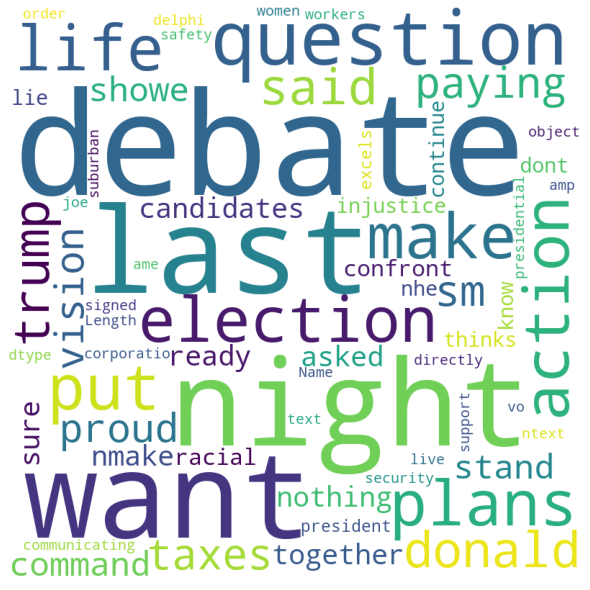

In [47]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [48]:
esBigramFreq = collections.Counter(list(threegram[1]))
top40 = esBigramFreq.most_common(40)

In [ ]:
esBigramFreqfour = collections.Counter(list(fourgram[1]))
top40four = esBigramFreqfour.most_common(40)

In [54]:
top40[1][1]

182

Text(0.5, 1.0, 'Top 40 Three Grams')

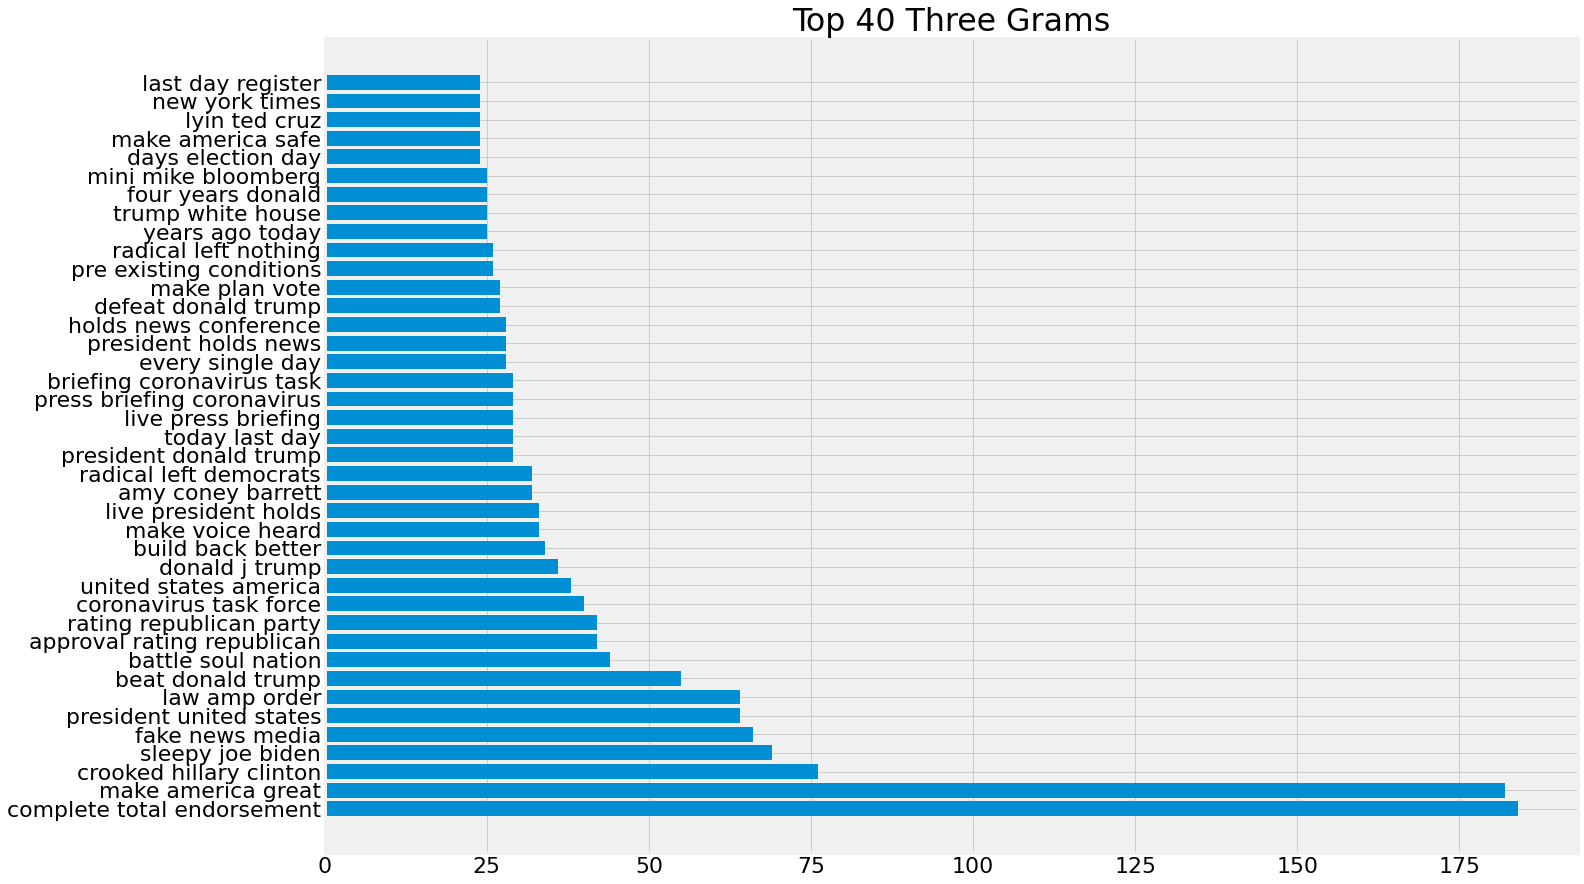

In [65]:
import matplotlib.pyplot as plt
top40  = [list(elem) for elem in top40]
xs, ys = [*zip(*top40)]
plt.figure(figsize=(20,15), )
plt.rcParams.update({'font.size': 22})
plt.barh(xs,ys)
plt.title ("Top 40 Three Grams")